In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas import Series,DataFrame

## 线形图 df.plot()    
### 直线、折线

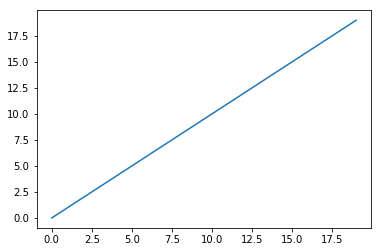

In [2]:
plt.plot(np.arange(20))
plt.show()

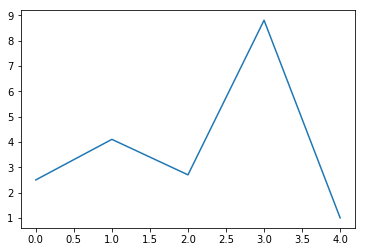

In [3]:
plt.plot(np.array([2.5, 4.1, 2.7, 8.8, 1.0]))
plt.show()

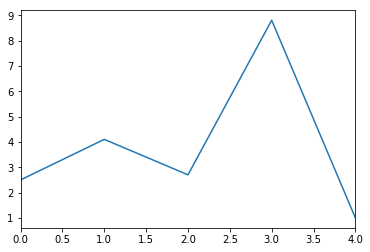

In [4]:
series=Series(np.array([2.5, 4.1, 2.7, 8.8, 1.0]))
series.plot()
plt.show()

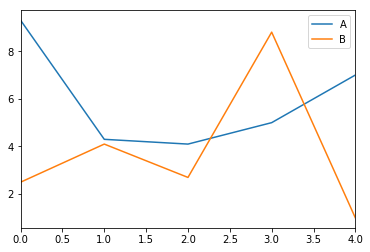

In [5]:
# 注意x轴索引，是伸缩的，不是典型坐标系
dataframe=DataFrame({'A':[9.3, 4.3, 4.1, 5.0, 7.0], 'B':[2.5, 4.1, 2.7, 8.8, 1.0]})
dataframe.plot()
plt.show()

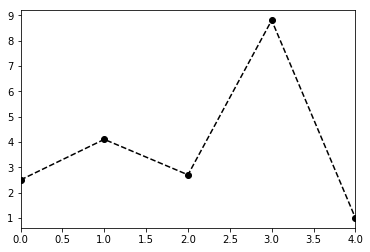

In [6]:
# dashed属性表示虚线
series.plot(linestyle='dashed', color='k', marker='o')
plt.show()

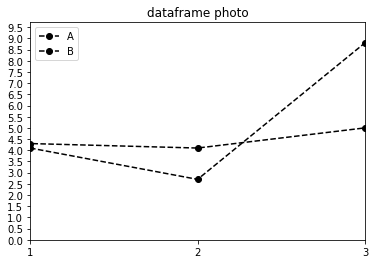

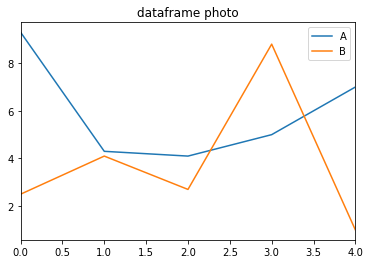

In [7]:
# xtick,ytick表示x轴和y轴的刻度，xlim表示限制范围
dataframe.plot(title='dataframe photo',linestyle='dashed', color='k', marker='o',
               xticks=[0, 1, 2, 3, 4], yticks=list(np.arange(0, 10.0, 0.5)) ,
               xlim=[1, 3])
dataframe.plot(title='dataframe photo')
plt.show()

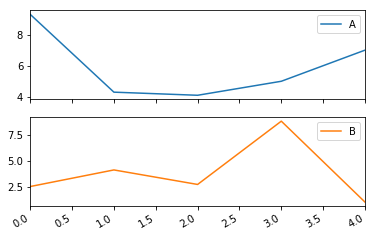

In [8]:
# 在绘图命令中加入subplots=True参数，则会将DataFrame当中的每一列结果绘制到一个子图片中，如果加入sharex=True参数，则各个子图片共用一个X轴标签；同理sharey=True表示共用一个Y轴
dataframe.plot(subplots=True, sharex=True) 
plt.show()

## 柱状图 df.plot(kind='bar')
### 显示值的大小

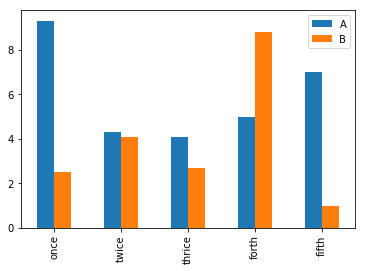

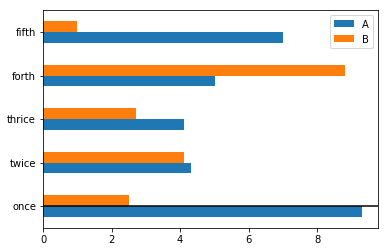

In [9]:
# Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度 
dataframe.index=['once', 'twice', 'thrice', 'forth', 'fifth']
dataframe.plot(kind='bar')
dataframe.plot(kind='barh') 
# x轴黑线标识
plt.axhline(0, color='k')
plt.show()

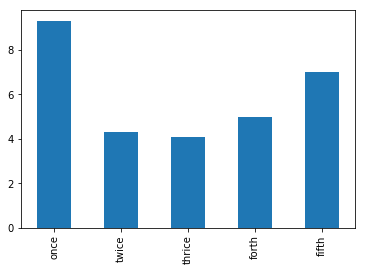

In [10]:
dataframe['A'].plot(kind='bar')
plt.show()

In [11]:
df=DataFrame({'part A': [2.8, 5.5, 5.5, 2.8, 2.8], 'part B': [4.2, 1.2, 4.5, 2.5, 
    8.0], 'part C': [3.3, 3.3, 1.0, 1.0, 1.0]}, index=['May', 'June', 'July', 
                                                    'August', 'September']) 
df.name='bonus'
df

,part A,part B,part C
May,2.8,4.2,3.3
June,5.5,1.2,3.3
July,5.5,4.5,1.0
August,2.8,2.5,1.0
September,2.8,8.0,1.0


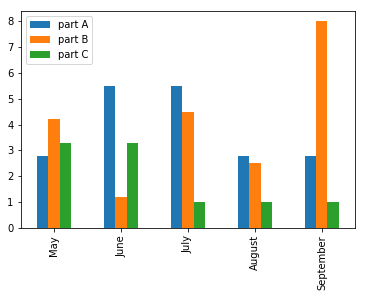

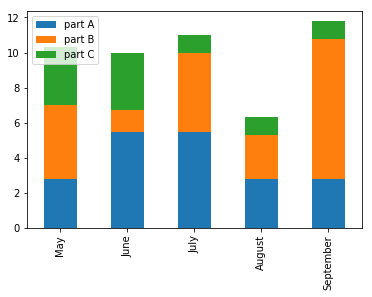

In [12]:
df.plot(kind='bar')
df.plot(kind='bar', stacked=True)
plt.show()

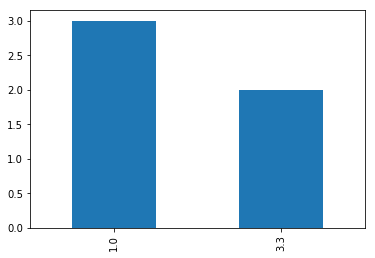

In [13]:
# 离散型变量个数分布图
df['part C'].value_counts().plot(kind='bar')
plt.show()

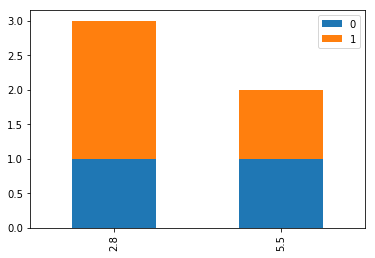

In [14]:
#两个离散型变量的关系图
temp1=df['part A'][df['part C']==3.3].value_counts()
temp2=df['part A'][df['part C']==1.0].value_counts()
temp=DataFrame({'0':temp1,'1':temp2})
temp.plot(kind='bar',stacked=True)
plt.show()

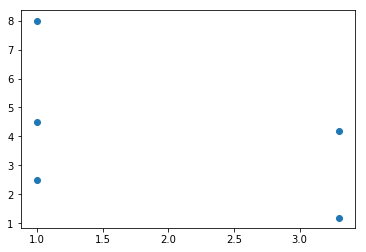

In [15]:
# 连续性变量和离散型变量的关系图
plt.scatter(df['part C'],df['part B'])
plt.show()

## 直方图 df.plot.hist()
### 对连续值离散化，划分一个个小区间，然后统计每个区间的数目

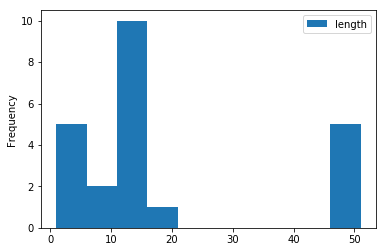

In [16]:
length=DataFrame({'length': [10, 20,15,10,1,12,12,12,13,13,13,14,14,14,51,51,51,51,
                             51,4,4,4,4]}) 
length.plot.hist()
plt.show()

### 利用获得的直方图可以绘制密度图，绘制的图形是根据直方图得到的条状分布的顶点连接后得到的平滑曲线


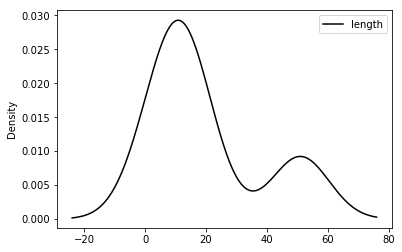

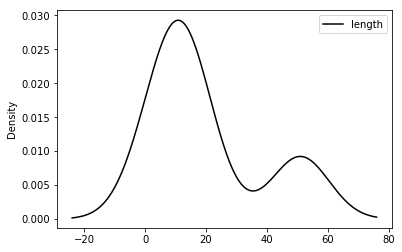

In [17]:
length=DataFrame({'length': [10, 20,15,10,1,12,12,12,13,13,13,14,14,14,51,51,51,51,
                             51,4,4,4,4]}) 
# 两者等价
length.plot.kde(color='k')
length.plot.density(color='k')
plt.show()

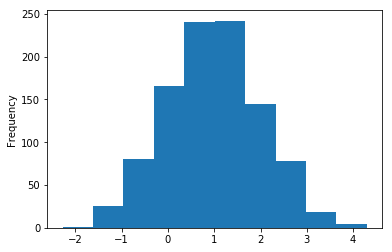

In [18]:
df4 = DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000), 'c': np.random.randn(1000) - 1}, index=range(1,1001), columns=['a', 'b', 'c'])
df4.a.plot.hist(stacked=True)
plt.show()

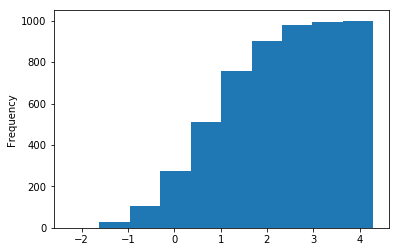

In [19]:
# 将a的值进行累加
df4['a'].plot.hist(cumulative=True)
plt.show()

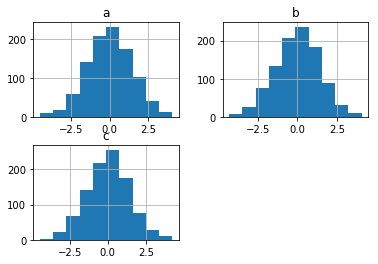

In [20]:
# 每列单独画图
df4.diff().hist()
plt.show()

## 箱线图 df.plot.box()

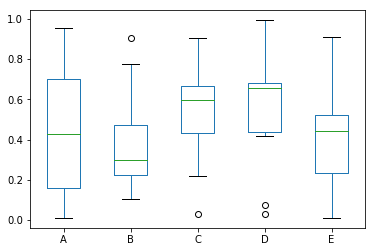

In [21]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()
plt.show()

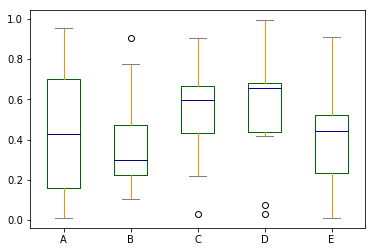

In [22]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray') 
df.plot.box(color=color)
plt.show()

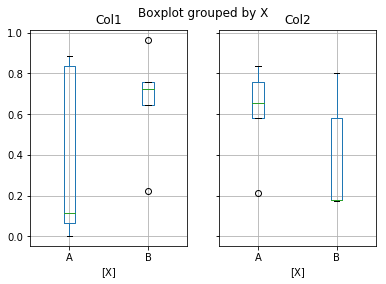

In [23]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B']) 
# df.plot.box(by='X') 得不到分组结果
df.boxplot(by='X')
plt.show()

In [24]:
df = pd.DataFrame(np.random.rand(10,3), columns=['Col1', 'Col2', 'Col3']) 
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B']) 
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B']) 
df 

,Col1,Col2,Col3,X,Y
0,0.858260,0.661767,0.826586,A,A
1,0.572695,0.116507,0.390039,A,B
2,0.719875,0.680677,0.534530,A,A
3,0.821993,0.851703,0.451335,A,B
4,0.287799,0.441360,0.097050,A,A
5,0.090264,0.212953,0.233437,B,B
6,0.964300,0.215679,0.629010,B,A
7,0.768354,0.588953,0.661919,B,B
8,0.883006,0.938097,0.575945,B,A
9,0.405667,0.473451,0.289598,B,B


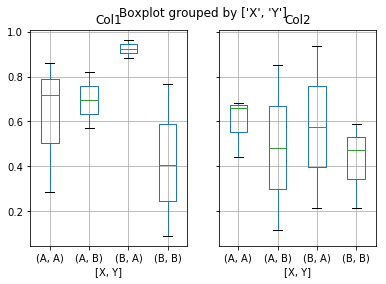

In [25]:
plt.figure()
bp = df.boxplot(column=['Col1','Col2'], by=['X','Y'])
plt.show()

## 区域面积图df.plot.area()

In [26]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd']) 
df

,a,b,c,d
0,0.180781,0.102301,0.935702,0.984777
1,0.115726,0.573059,0.577797,0.707077
2,0.614509,0.158253,0.346238,0.396717
3,0.004316,0.247372,0.348023,0.496254
4,0.972340,0.661115,0.137480,0.497593
5,0.142613,0.091944,0.251133,0.960668
6,0.129058,0.060762,0.876695,0.756575
7,0.235225,0.735874,0.939958,0.960008
8,0.849229,0.039799,0.150536,0.945304
9,0.843284,0.845273,0.122545,0.490281


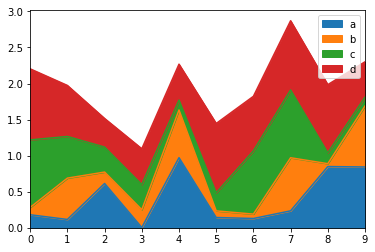

In [27]:
df.plot.area() #生成堆积图 
# df.plot.area(stacked=False) #非堆积效果图
plt.show()

## 散点图 plot.scatter()

In [28]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.389686,0.165670,0.439996,0.994475
1,0.744133,0.595755,0.549556,0.222830
2,0.861327,0.486114,0.396366,0.695367
3,0.208397,0.318074,0.986775,0.411710
4,0.942651,0.606489,0.473140,0.536314
5,0.248485,0.146062,0.561698,0.404992
6,0.038683,0.373290,0.988982,0.602197
7,0.662970,0.763890,0.201518,0.557673
8,0.932772,0.733630,0.697876,0.512894
9,0.862433,0.152860,0.842763,0.224780


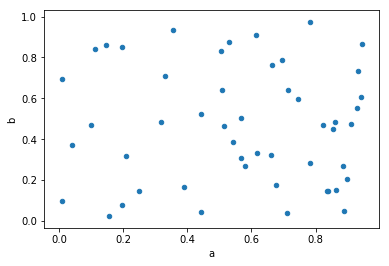

In [29]:
df.plot.scatter(x='a', y='b')
plt.show()

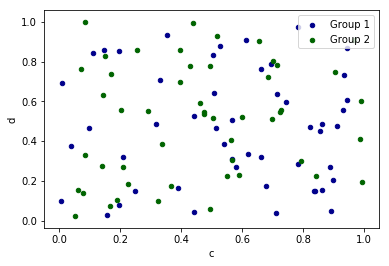

In [30]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax) 
plt.show()

## 饼图 df.plot.pie()

In [31]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series

a    0.423364
b    1.060412
c    1.107074
d    2.767333
Name: series, dtype: float64

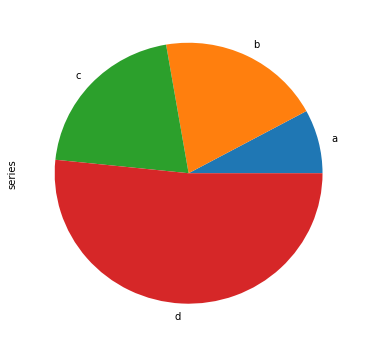

In [32]:
series.plot.pie(figsize=(6, 6))
plt.show()

In [33]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y']) 
df

,x,y
a,1.576181,0.047920
b,1.650267,0.859470
c,1.069430,0.609328
d,0.457344,1.958632


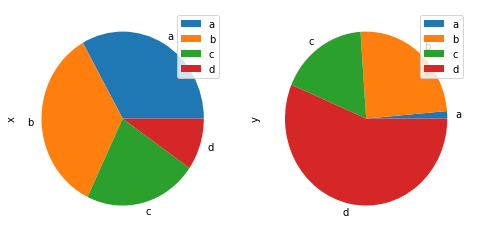

In [34]:
df.plot.pie(subplots=True, figsize=(8, 4))
plt.show()

In [35]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series') 
series 

a    2.267945
b    2.690101
c    0.976650
d    2.017037
Name: series, dtype: float64

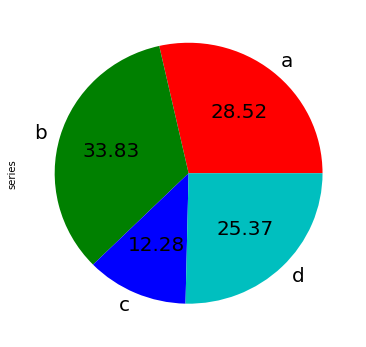

In [36]:
series.plot.pie(colors=['r', 'g', 'b', 'c'], autopct='%.2f', fontsize=20, figsize=(6, 6))
plt.show()

In [37]:
series = pd.Series([0.1] * 4, index=['a', 'b', 'c', 'd'], name='series2') 
series 

a    0.1
b    0.1
c    0.1
d    0.1
Name: series2, dtype: float64

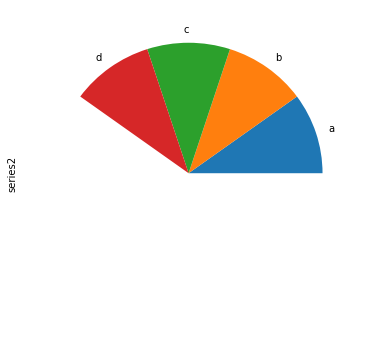

In [38]:
series.plot.pie(figsize=(6, 6)) 
plt.show()